In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv(os.path.join('data','data.csv'))
data = data[['Q' + str(i) for i in range(13, 29)]]
data

,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [14]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data)

In [8]:
y_pred = DBSCAN(eps=1, min_samples=5).fit_predict(data_pca)
set(list(y_pred))

{-1, 0, 1, 2, 3, 4, 5}

In [10]:
import numpy as np
for i in range(-1, 10):
    print(len(data[y_pred==i]))


521
4553
718
6
5
13
4
0
0
0
0


In [25]:
import numpy as np
len(np.argwhere(y_pred==-1))

3

In [12]:
tsne_2=TSNE(n_components=2, metric='euclidean', init='pca')
X_tnse_2d = tsne_2.fit_transform(data_pca)

521
4553
718
6
5
13
4


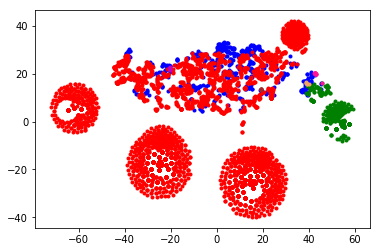

In [15]:
# plt.scatter(X_tnse_2d[:, 0], X_tnse_2d[:, 1] * -1, c=y_pred)

color = ['b', 'r', 'g', 'sandybrown', 'brown', 'deeppink', 'm']
for i in range(-1, 6):
    _ = np.argwhere(y_pred == i)
    _ = [c[0] for c in _]
    print(len(_))
    X_tnse_2d_i = X_tnse_2d[_]
    plt.scatter(X_tnse_2d_i[:, 0], X_tnse_2d_i[:, 1], c=color[i + 1], marker='.')
    

plt.show()

In [44]:
pca_2 = PCA(n_components=5)
X_pca_2d = pca_2.fit_transform(data)

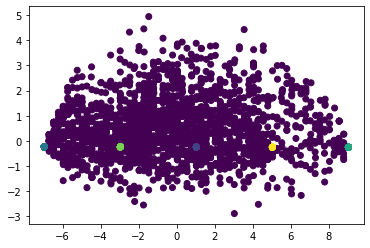

In [45]:
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_pred)
plt.show()

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def k_means(data, n_clusters):
    data = np.array(data, dtype=np.float64)

    samples, dims = data.shape
    print(samples, dims)


if __name__ == '__main__':
    data = pd.read_csv(os.path.join('data', 'data.csv'))
    data = data[['Q' + str(i) for i in range(13, 29)]]

    k_means(data, n_clusters=3)

5820 16
